In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1
cust = pd.read_csv("Customer.csv")
prod = pd.read_csv("prod_cat_info.csv")
tran = pd.read_csv("Transactions.csv")

table = cust.merge(tran,how="inner",left_on=cust.customer_Id,right_on=tran.cust_id).merge(prod,right_on=["prod_cat_code","prod_sub_cat_code"],left_on=["prod_cat_code","prod_subcat_code"])
table = table[['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id', 'tran_date', 'Qty','Rate', 'Tax', 'total_amt', 'Store_type', 'prod_subcat_code', 'prod_cat_code', 'prod_cat','prod_subcat']]

In [3]:
#correcting the dates
table.loc[:,"DOB"]=pd.to_datetime(table.DOB)
table.loc[:,"tran_date"] = pd.to_datetime(table.tran_date)
Customer_Final = table.copy()

In [4]:
#2 A
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23053 non-null  int64         
 1   DOB               23053 non-null  datetime64[ns]
 2   Gender            23044 non-null  object        
 3   city_code         23045 non-null  float64       
 4   transaction_id    23053 non-null  int64         
 5   tran_date         23053 non-null  datetime64[ns]
 6   Qty               23053 non-null  int64         
 7   Rate              23053 non-null  int64         
 8   Tax               23053 non-null  float64       
 9   total_amt         23053 non-null  float64       
 10  Store_type        23053 non-null  object        
 11  prod_subcat_code  23053 non-null  int64         
 12  prod_cat_code     23053 non-null  int64         
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

In [5]:
#2 B
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_subcat_code,prod_cat_code,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,5,187,98.175,1033.175,TeleShop,7,5,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2,464,97.440,1025.440,e-Shop,7,5,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2,197,41.370,435.370,Flagship store,7,5,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,4,1141,479.220,5043.220,e-Shop,7,5,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,4,1020,428.400,4508.400,e-Shop,7,5,Books,Fiction
5,274630,1970-01-02,M,4.0,78357345891,2012-11-04,1,646,67.830,713.830,TeleShop,7,5,Books,Fiction
6,273541,1970-01-02,M,4.0,23916816961,2013-09-02,4,410,172.200,1812.200,e-Shop,7,5,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,2013-09-03,1,1441,151.305,1592.305,e-Shop,7,5,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,2012-04-26,5,746,391.650,4121.650,MBR,7,5,Books,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,2012-11-01,4,1049,440.580,4636.580,MBR,7,5,Books,Fiction


In [6]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_subcat_code,prod_cat_code,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,2011-10-06,1,1252,131.460,1383.460,MBR,10,5,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,2013-12-24,4,1036,435.120,4579.120,TeleShop,10,5,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,2012-11-19,1,1401,147.105,1548.105,Flagship store,10,5,Books,Non-Fiction
23046,272141,1992-02-12,F,10.0,71337087467,2012-07-22,-3,-1422,447.930,-4713.930,e-Shop,10,5,Books,Non-Fiction
23047,272141,1992-02-12,F,10.0,71337087467,2012-07-16,3,1422,447.930,4713.930,e-Shop,10,5,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,3,224,70.560,742.560,TeleShop,10,5,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,4,691,290.220,3054.220,Flagship store,10,5,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,2,411,86.310,908.310,e-Shop,10,5,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,-4,-1408,591.360,-6223.360,e-Shop,10,5,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,2011-01-26,4,1408,591.360,6223.360,e-Shop,10,5,Books,Non-Fiction


In [7]:
#2 C

five_summary = Customer_Final.describe()[3:10].T.apply(lambda s: s.apply('{0:.0f}'.format))
five_summary.columns= ("min", "Q1", "median", "Q3", "max")
five_summary

,min,Q1,median,Q3,max
customer_Id,266783,268935,270980,273114,275265
city_code,1,3,5,8,10
transaction_id,3268991,24938639453,50093131361,75329995679,99987549630
Qty,-5,1,3,4,5
Rate,-1499,312,710,1109,1500
Tax,7,98,199,366,788
total_amt,-8271,762,1755,3569,8288
prod_subcat_code,1,3,5,10,12
prod_cat_code,1,2,4,5,6


In [8]:
#2 D
df = Customer_Final[["Store_type","Gender","prod_cat","prod_subcat"]]
df.value_counts()

Store_type      Gender  prod_cat          prod_subcat    
e-Shop          M       Electronics       Mobiles            242
                F       Home and kitchen  Tools              237
                M       Books             Fiction            232
                F       Footwear          Women              231
                M       Books             Children           230
                                                            ... 
TeleShop        F       Books             Non-Fiction         80
                        Electronics       Mobiles             78
                                          Audio and video     78
Flagship store  M       Books             Academic            74
                        Footwear          Mens                74
Length: 184, dtype: int64

In [9]:
#2 D

store = pd.crosstab(Customer_Final['Store_type'], "count")
cities = pd.crosstab(Customer_Final['city_code'],"count")
gender = pd.crosstab(Customer_Final['Gender'],"count")
cat = pd.crosstab(Customer_Final['prod_cat'], "count")
subcat = pd.crosstab(Customer_Final['prod_subcat'],"count")
print(store,"\n\n")
print(cities,"\n\n")
print(gender,"\n\n" )
print(cat,"\n\n")
print(subcat,"\n\n" )

col_0           count
Store_type           
Flagship store   4577
MBR              4661
TeleShop         4504
e-Shop           9311 


col_0      count
city_code       
1.0         2258
2.0         2270
3.0         2411
4.0         2422
5.0         2360
6.0         2127
7.0         2356
8.0         2330
9.0         2178
10.0        2333 


col_0   count
Gender       
F       11233
M       11811 


col_0             count
prod_cat               
Bags               1998
Books              6069
Clothing           2960
Electronics        4898
Footwear           2999
Home and kitchen   4129 


col_0                count
prod_subcat               
Academic               967
Audio and video        952
Bath                  1023
Cameras                985
Children              1035
Comics                1031
Computers              958
DIY                    989
Fiction               1043
Furnishing            1007
Kids                  1997
Kitchen               1037
Mens                  2912

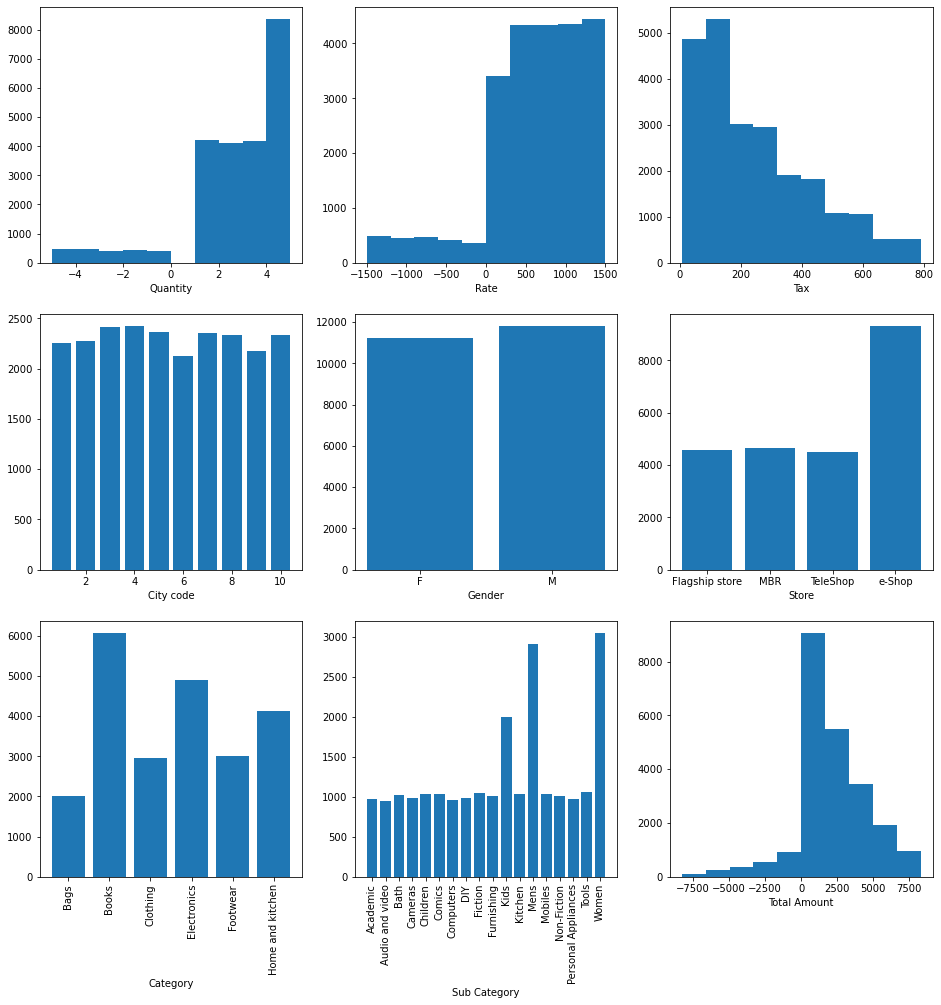

In [22]:
#3
fig, axs = plt.subplots(3,3,figsize=(16,16))

axs[0,0].hist(Customer_Final.Qty)
axs[0,1].hist(Customer_Final.Rate)
axs[0,2].hist(Customer_Final.Tax)
axs[1,0].bar(cities.index,cities["count"])
axs[1,1].bar(gender.index,gender["count"])
axs[1,2].bar(store.index,store["count"])
axs[2,0].bar(cat.index,cat["count"])
axs[2,1].bar(subcat.index,subcat["count"])
axs[2,2].hist(Customer_Final.total_amt)

axs[0,0].set_xlabel("Quantity")
axs[0,1].set_xlabel("Rate")
axs[0,2].set_xlabel("Tax")
axs[1,0].set_xlabel("City code")
axs[1,1].set_xlabel("Gender")
axs[1,2].set_xlabel("Store")
axs[2,0].set_xlabel("Category")
axs[2,0].tick_params(axis='x', labelrotation=90)
axs[2,1].set_xlabel("Sub Category")
axs[2,1].tick_params(axis='x', labelrotation=90)
axs[2,2].set_xlabel("Total Amount")
plt.show()

In [23]:
#4 A
max_time = Customer_Final.tran_date.max()
min_time = Customer_Final.tran_date.min()
timeperiod = max_time-min_time
print("Time Period:",timeperiod.days,"days")

Time Period: 1430 days


In [24]:
#4 B
Customer_Final
print("Count of total negative transaction is",Customer_Final[Customer_Final.total_amt < 0].shape[0])

Count of total negative transaction is 2177


In [25]:
#5
MF_cat = Customer_Final.drop_duplicates(subset=["transaction_id"]).pivot_table(index="prod_cat",columns="Gender",values="transaction_id",aggfunc="count")
MF_cat.sort_values(by=["M","F"],ascending=False)

Gender,F,M
prod_cat,,
Books,2657,2825
Electronics,2135,2351
Home and kitchen,1810,1922
Clothing,1286,1388
Footwear,1380,1327
Bags,890,899


In [59]:
#6
cc_df = cust.pivot_table(index="city_code",values="customer_Id",aggfunc="count").sort_values(by="customer_Id",ascending=False)
percc = round(cc_df.head(1).sum().sum()/cc_df.sum().sum()*100,2)
print(f"The best city code is {cc_df.reset_index().city_code[0]} with {percc}% of customers")

The best city code is 3.0 with 10.54% of customers


In [60]:
#7
df = Customer_Final[(Customer_Final.Qty>0)&(Customer_Final.total_amt>0)]
df = df.groupby(by="Store_type").agg({"Qty":"sum","total_amt":"sum"})
by_amt = df.sort_values(by="total_amt",ascending=False).reset_index().iloc[0]["Store_type"]
by_qty = df.sort_values(by="Qty",ascending=False).reset_index().iloc[0]["Store_type"]
if by_amt == by_qty:
    print(by_amt)

e-Shop


In [61]:
#8
df = Customer_Final[(Customer_Final.Store_type=="Flagship store")]
df[(df.prod_cat == "Electronics") | (df.prod_cat == "Clothing")].total_amt.sum()

3409559.27

In [62]:
#9
Customer_Final[(Customer_Final.Gender == "M") & (Customer_Final.prod_cat == "Electronics")].total_amt.sum()

5703109.425

In [63]:
#10
df = Customer_Final[Customer_Final.total_amt > 0]
df = df.drop_duplicates("transaction_id")
cust_df = df.groupby("customer_Id").agg({"transaction_id":"count"})
len(cust_df[cust_df.transaction_id>10])

6

In [64]:
#11
import datetime as dt
today = dt.datetime.today()
new_df = Customer_Final[(today.year-Customer_Final.DOB.dt.year<35)&(today.year-Customer_Final.DOB.dt.year>25)]

In [65]:
#11A
new_df[new_df.prod_cat.isin(["Electronics","Books"])].total_amt.sum()

2794540.58

In [66]:
#11B

start_date = dt.datetime(year=2014,day=1,month=1)
end_date = dt.datetime(year=2014,day=1,month=3)

new_df[(new_df.tran_date>start_date)&(new_df.tran_date<end_date)].total_amt.sum()

179287.355